In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.isnull().sum().sum() #use for total null value

np.int64(149)

In [ ]:
df.shape[0] # use for check row shape

614

In [ ]:
# use:We are finding the percentage of missing (null) values in each column
(df.isnull().sum()/df.shape[0])*100  

# If a column has more than 50% null values, we will remove that column. If it has less than 50%, we will handle the null values.

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [ ]:
# use:We are finding the percentage of missing (null) values in Total column
(df.isnull().sum().sum()/(df.shape[0]*df.shape[1]))*100  

np.float64(1.8667000751691305)

In [ ]:
df.notnull().sum().sum()

np.int64(7833)

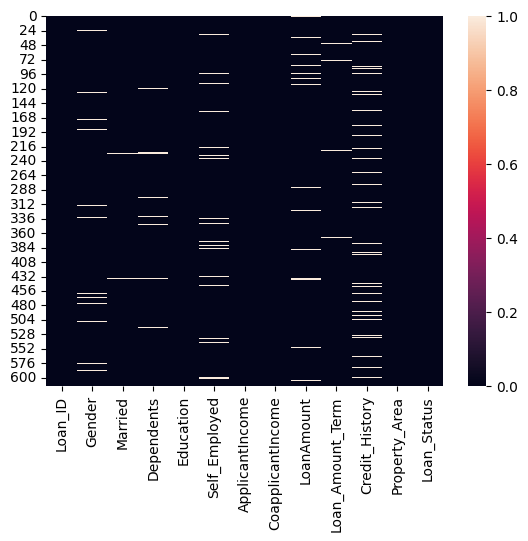

In [ ]:
sns.heatmap(df.isnull())
plt.show() #We use plt.show() to display the graph clearly.

# white shadow is null value and black shadow mean datavalue present

**Handling Missing Value**

     (---DROP---)

In [ ]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N


In [ ]:
df.shape

(614, 13)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

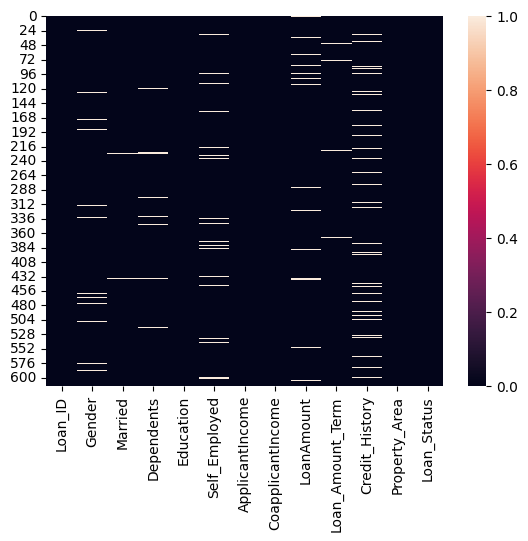

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.drop(columns='Credit_History',inplace=True)

#inplace=True is used to make changes directly in the original dataset
#without creating a copy.

In [ ]:
df.shape # so 1 column has removed

(614, 12)

In [ ]:
df.dropna(inplace=True) #Drop nullvalue from each row

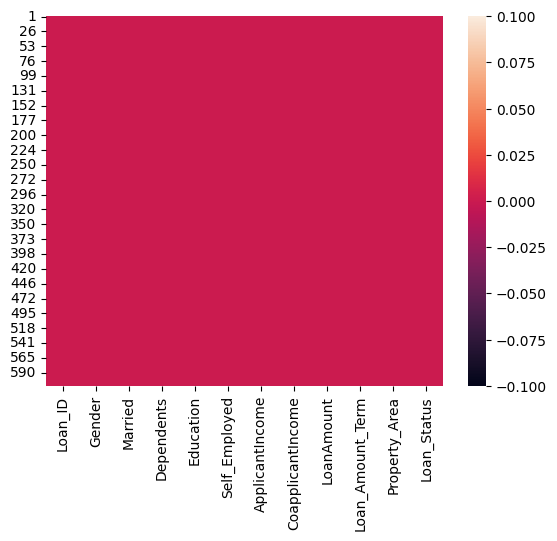

In [ ]:
sns.heatmap(df.isnull())
plt.show()

In [ ]:
df.shape[0] #Row shape

523

In [ ]:
# How much are we data loss?
((614-523)/614)*100

14.82084690553746

**HANDLING MISSING VALUES** 

(IMPUTING CATEGORY DATA)

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# df.fillna(10) #it's wrong method because many datatypes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
# df.fillna(method='bfill')
# df.fillna(method='ffill')
# df.fillna(method='bfill',axis=0)
# df.fillna(method='ffill',axis=1)

In [ ]:
# df['Gender'].mode()  #mode use for which value are more use in dataset
df['Gender'].mode()[0]  

'Male'

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [ ]:
# I have to fill (Mode) in all object datatypes 

# df.select_dtypes(include='object')  #first of all you have to select the all datatypes
# df.select_dtypes(include='object').isnull().sum()

for i in df.select_dtypes(include='object').columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_1084\507161683.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

**HANDLING MISSING VALUE**

( SCIKIT-LEARN )
Scikit-learn is a tool in Python used to apply machine learning techniques like classification, regression, and clustering with simple code.

Sklearn makes machine learning easy by providing built-in functions for data cleaning, model building, and evaluation.

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
df.select_dtypes(include='float64').columns

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], dtype='object')

SimpleImputer from sklearn.impute is used to fill missing values (NaN) in a dataset.

🔹 Why use it?

✅ To handle missing data easily.

✅ Fills missing values with mean, median, mode, or custom value.

In [ ]:
from  sklearn.impute import SimpleImputer 
 #impute is  modules in sklearn

In [ ]:
si=SimpleImputer(strategy='mean')
ar=si.fit_transform(df[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [ ]:
# pd.DataFrame(ar,columns=['CoapplicantIncome','LoanAmount','Loan_Amount_Term'])
# or 
new_df=pd.DataFrame(ar,columns=df.select_dtypes(include='float64').columns)

In [ ]:
new_df.isnull().sum()

CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
dtype: int64

**ONE HOT ENCODING**

AND DUMMY VARIABLES

When we use to convert **category** date into **numerical** data so also called as **One Hot Encoding**

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14128\3554240144.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)


In [ ]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_14128\1977305859.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0],inplace=True)


In [ ]:
# Encoding we always will use 2D=[[]]
en_data=df[['Gender','Married']]  #this column so we have to convert onehot encoder

In [ ]:
pd.get_dummies(en_data).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Gender_Female  614 non-null    bool 
 1   Gender_Male    614 non-null    bool 
 2   Married_No     614 non-null    bool 
 3   Married_Yes    614 non-null    bool 
dtypes: bool(4)
memory usage: 2.5 KB


OneHotEncoder from sklearn.preprocessing is used to convert categorical data into a binary (0/1) format that machine learning models can understand.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe=OneHotEncoder()
ar=ohe.fit_transform(en_data).toarray()


The meaning of a **sparse matrix** is that most of its content items is filled with 0s and 1s.

In [ ]:
pd.DataFrame(ar,columns=['Gender_Femal','Gender_Male','Married_No','Married_Yes'])

,Gender_Femal,Gender_Male,Married_No,Married_Yes
0,0.0,1.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
609,1.0,0.0,1.0,0.0
610,0.0,1.0,0.0,1.0
611,0.0,1.0,0.0,1.0
612,0.0,1.0,0.0,1.0


In [ ]:
ohe=OneHotEncoder(drop='first')
ar=ohe.fit_transform(en_data).toarray()
ar

array([[1., 0.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [0., 0.]], shape=(614, 2))

In [ ]:
pd.DataFrame(ar,columns=['Gender_Male','Married_Yes'])

,Gender_Male,Married_Yes
0,1.0,0.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
609,0.0,0.0
610,1.0,1.0
611,1.0,1.0
612,1.0,1.0


**LABLE ENCODING**

Label encoding used  for nominal data (e.g., colors: red, green, blue)

Label Encoding converts categorical labels into numeric values (e.g., "Red" → 0, "Blue" → 1).

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({'Name':['cube','aqua','price','Amazing']})
df

,Name
0,cube
1,aqua
2,price
3,Amazing


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
df['en-name']=le.fit_transform(df['Name'])

In [ ]:
df

,Name,en-name
0,cube,2
1,aqua,1
2,price,3
3,Amazing,0


Perform **LabelEncoding** on real world loan dataset

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
le=LabelEncoder()
df['lab_en-property']=le.fit_transform(df['Property_Area'])


In [ ]:
df['lab_en-property']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: lab_en-property, Length: 614, dtype: int64

**ORDINAL ENCODING**

Used for ordinal data (e.g., low < medium < high)

In [ ]:
import pandas as pd

In [ ]:
df=pd.DataFrame({'Size':['m','xl','l','s','xxl','l','xl','s','m','l']})
df

,Size
0,m
1,xl
2,l
3,s
4,xxl
5,l
6,xl
7,s
8,m
9,l


In [ ]:
# Encoding we will always use  2D=[[]]
ord_data=[['s','m','l','xl','xxl']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe=OrdinalEncoder(categories=ord_data)
oe.fit(df[['Size']])

OrdinalEncoder(categories=[['s', 'm', 'l', 'xl', 'xxl']])

In [ ]:
df['Size_en']=oe.transform(df[['Size']])

In [ ]:
df

,Size,Size_en
0,m,1.0
1,xl,3.0
2,l,2.0
3,s,0.0
4,xxl,4.0
5,l,2.0
6,xl,3.0
7,s,0.0
8,m,1.0
9,l,2.0


In [ ]:
# we can descided size and order range

ord_data1={'s':0,'m':1,'l':2,'xl':3,'xxl':4}

In [ ]:
df['new_size_en']=df['Size'].map(ord_data1)

In [ ]:
df

,Size,Size_en,new_size_en
0,m,1.0,1
1,xl,3.0,3
2,l,2.0,2
3,s,0.0,0
4,xxl,4.0,4
5,l,2.0,2
6,xl,3.0,3
7,s,0.0,0
8,m,1.0,1
9,l,2.0,2


In [ ]:
df

,Size,Size_en,new_size_en
0,m,1.0,1
1,xl,3.0,3
2,l,2.0,2
3,s,0.0,0
4,xxl,4.0,4
5,l,2.0,2
6,xl,3.0,3
7,s,0.0,0
8,m,1.0,1
9,l,2.0,2


In [ ]:
# once more try again
ord_data2={'s':4,'m':5,'l':6,'xl':12,'xxl':10}

In [ ]:
df['newupdate_size_en']=df['Size'].map(ord_data2)

In [ ]:
df

,Size,Size_en,new_size_en,newupdate_size_en
0,m,1.0,1,5
1,xl,3.0,3,12
2,l,2.0,2,6
3,s,0.0,0,4
4,xxl,4.0,4,10
5,l,2.0,2,6
6,xl,3.0,3,12
7,s,0.0,0,4
8,m,1.0,1,5
9,l,2.0,2,6


Perform ordinal encoding on real world dataset "loan dataset" 

In [ ]:
df=pd.read_csv('loan.csv')
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,"git commit -m ""Deleted unrequired files""",Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,git push origin branch-name,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1,Semiurban,N


In [ ]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [ ]:
# we use 2D[[]] in encoding 
order_data=[['Rural','Semiurban','Urban']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe=OrdinalEncoder(categories=order_data)
df['Property_Area_size']=oe.fit_transform(df[['Property_Area']]) 

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Property_Area_size
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y,2.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,0.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,2.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,2.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y,0.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y,0.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y,2.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y,2.0


**OUTLIER**

What : outlier normaley out of range value 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan.csv')
df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**How can we find outliers?**

1. using Boxplot 

2. if distribution plot is normal distribution so In which not outerlier

3. but  distribution plot is not normal distribution because this tail is very long so In which present a outerlier











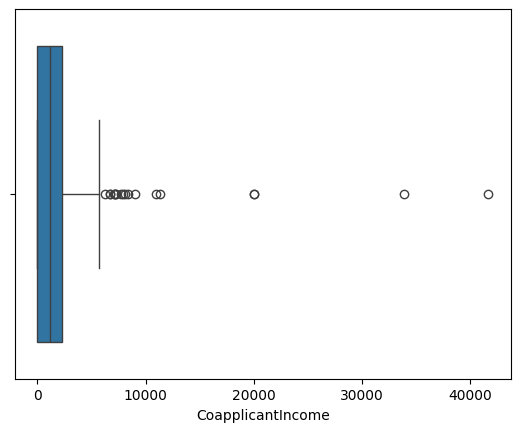

In [ ]:
# The column for which you are creating a boxplot 
# should not contain any null values if null present so fill a null value
sns.boxplot(x="CoapplicantIncome",data=df)
plt.show()

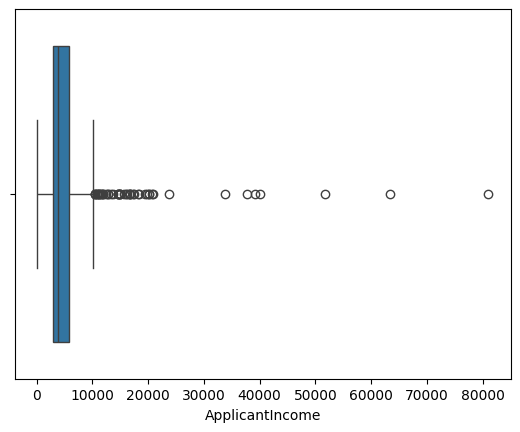

In [ ]:
sns.boxplot(x='ApplicantIncome',data=df)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_14128\633300290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


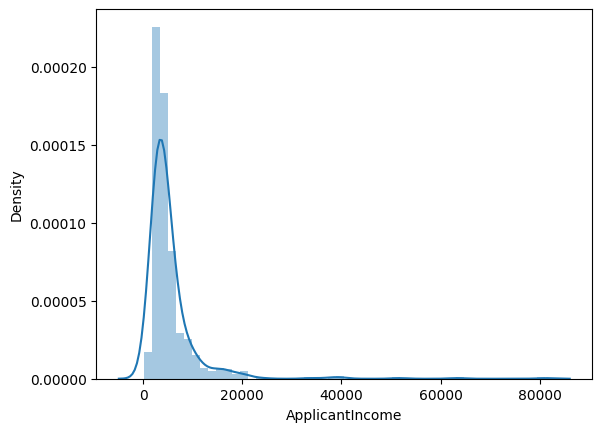

In [ ]:
sns.distplot(df['ApplicantIncome'])
plt.show()

# In which present outerlier because tail is long  

## How can remove  outlier ##

remove outlier using: **IQR**,**Z-Score**

**Box plot: Use IQR method to remove outliers.**

**Normal distribution: Use Z-score (Z-value) to detect and remove outliers.**
 
**Use IQR when:**

Data is not normally distributed

You want a robust method (less sensitive to extreme values)

Small to medium-sized datasets

**Use Z-Score when:**

Data is normally distributed

You need a standardized method

You're working with larger datasets

now we are using **IQR** in Boxplot for removing outlier
1. IQR=Q3-Q1
2. min=Q1-(1.5*IQR)
3. Max=Q3+(1.5*IQR)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


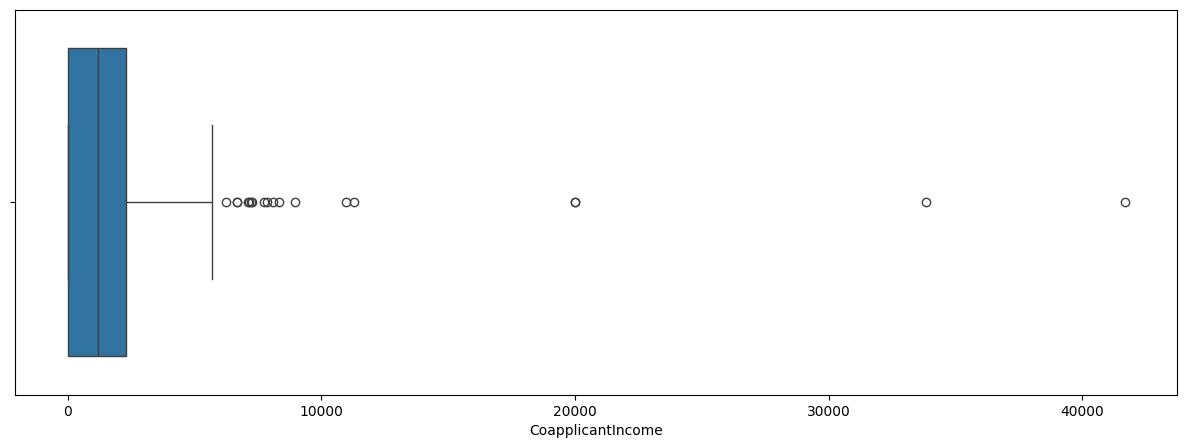

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(x='CoapplicantIncome',data=df)
plt.show()

In [ ]:
q1=df['CoapplicantIncome'].quantile(0.25)
q3=df['CoapplicantIncome'].quantile(0.75)
print(q1) 
print(q3)

# Directly q1andq3 answer show in df.describe() 

0.0
2297.25


In [ ]:
IQR=q3-q1
print(IQR)

2297.25


In [ ]:
min_range=q1-(1.5*IQR)
max_range=q3+(1.5*IQR)
print(min_range)
print(max_range)

-3445.875
5743.125


In [ ]:
new_dataset=df[df['CoapplicantIncome']<=max_range] #outlier remove when we will take in a df value lessthan and equal to max_range

In [ ]:
new_dataset.shape

(596, 13)

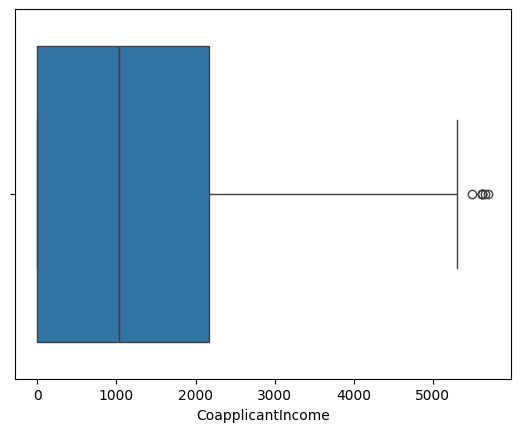

In [ ]:
sns.boxplot(x='CoapplicantIncome',data=new_dataset)
plt.show()

In [ ]:
update_df=df[df['ApplicantIncome']<=max_range]

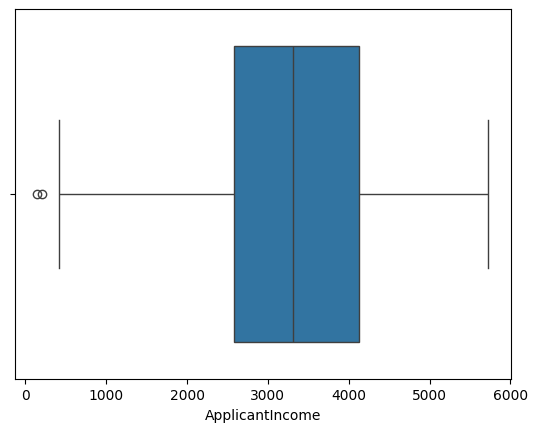

In [ ]:
# now again check outlier
sns.boxplot(x='ApplicantIncome',data=update_df)
plt.show()

**Normal distribution: Use Z-score (Z-value) to detect and remove outliers.**

Z=(X−μ) / σ 

Where:

X= data point


μ = mean


σ = standard deviation

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
# check null value if null value is not fulfill 
# so please fulfill for find outlier
df.isnull().sum() 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# using **describe** we can assum,analysis the Outlier 
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


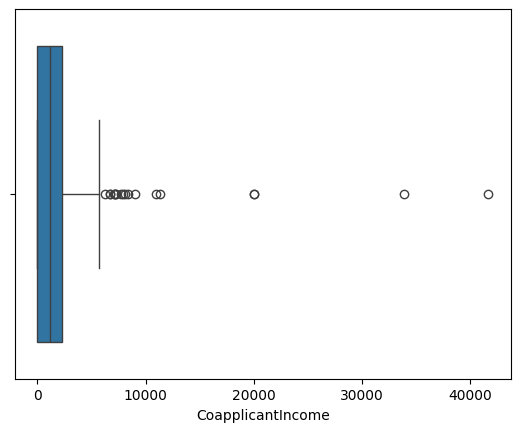

In [ ]:
sns.boxplot(x='CoapplicantIncome',data=df)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_7812\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


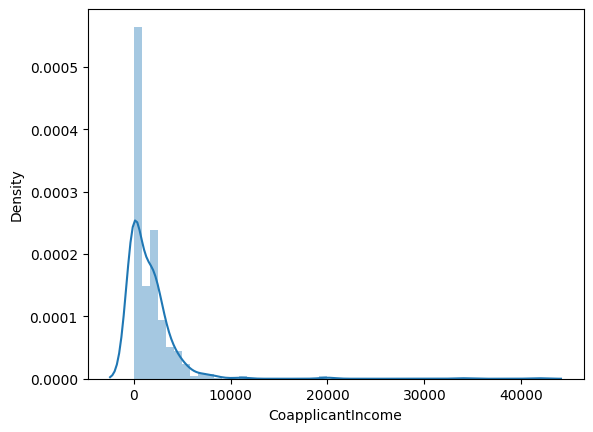

In [ ]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
# new  method use to remove outlier
min_range=df['CoapplicantIncome'].mean()-(3*df['CoapplicantIncome'].std())
max_range=df['CoapplicantIncome'].mean()+(3*df['CoapplicantIncome'].std())


In [ ]:
min_range,max_range

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

In [ ]:
new_dataset=df[df['CoapplicantIncome']<=max_range]

<Axes: xlabel='CoapplicantIncome'>

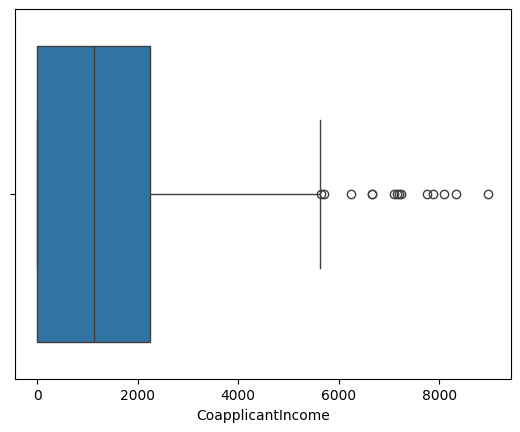

In [ ]:
sns.boxplot(x='CoapplicantIncome',data=new_dataset)

perform Z-score and remove outlier

In [ ]:
Z_score=(df['CoapplicantIncome']-df['CoapplicantIncome'].mean())/(df['CoapplicantIncome'].std())

In [ ]:
df['Z-score']=Z_score

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Z-score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y,-0.554036


In [ ]:
# remove outlier
df[df['Z-score']<3]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Z-score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1,Urban,Y,-0.554036


## FEATURE SCALING ##

**Types :** Standardization and Normalization

**explian hindi**:(Agar ek feature ka size bahut bada ho aur doosre ka chhota,toh feature scaling unka size similar bana deta hai,
taaki model dono ko barabar importance de)

**Defination:** Feature scaling means making all data values similar in size so that no big number confuses the model.
It helps the computer treat all features equally.


**Simple Example:**

Agar ek feature ke values hain: [10, 100, 1000], aur dusra feature hai [1, 2, 3]
To bina scaling ke pehla feature dominate karega.
Scaling ke baad dono features same importance ke ho jaate hain.

Conclusion: Feature scaling model ki accuracy aur speed dono improve karta hai.

## Standardization (Z-score Scaling) ## 
Standardization means changing data so that its **mean value becomes 0** and **variance value becomes 1** (Variance?:var is square of std)

Standardization Formula z=x−μ/ σ

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
# There should be no null values in the column -
# where the operation is being performed.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_7812\3385199946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


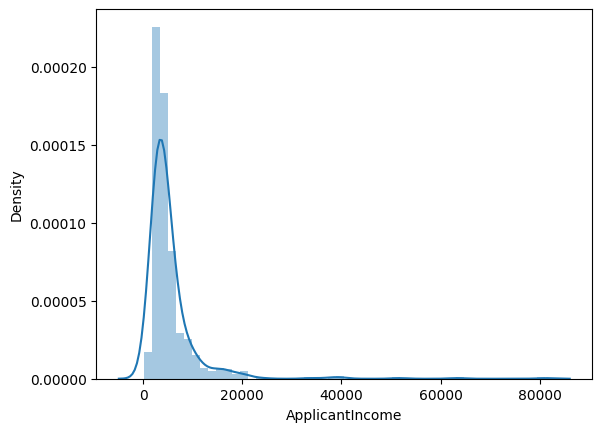

In [ ]:
sns.distplot(df['ApplicantIncome'])
plt.show()

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()
ss.fit(df[['ApplicantIncome']])  # yaha data 2dimentional[[]] me put kerte ha

StandardScaler()

In [ ]:
df['ApplicantIncome_ss']=pd.DataFrame(ss.transform(df[['ApplicantIncome']]))

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_ss
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y,0.072991
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,-0.134412
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,-0.393747


In [ ]:
# now check value of mean 0 and std square value var 1
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,ApplicantIncome_ss
count,614.000000,614.000000,592.000000,600.00000,6.140000e+02
mean,5403.459283,1621.245798,146.412162,342.00000,-4.339634e-18
std,6109.041673,2926.248369,85.587325,65.12041,1.000815e+00
min,150.000000,0.000000,9.000000,12.00000,-8.606493e-01
25%,2877.500000,0.000000,100.000000,360.00000,-4.138159e-01
50%,3812.500000,1188.500000,128.000000,360.00000,-2.606393e-01
75%,5795.000000,2297.250000,168.000000,360.00000,6.414426e-02
max,81000.000000,41667.000000,700.000000,480.00000,1.238462e+01


C:\Users\admin\AppData\Local\Temp\ipykernel_7812\331114835.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])
C:\Users\admin\AppData\Local\Temp\ipykernel_7812\331114835.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome_ss'])


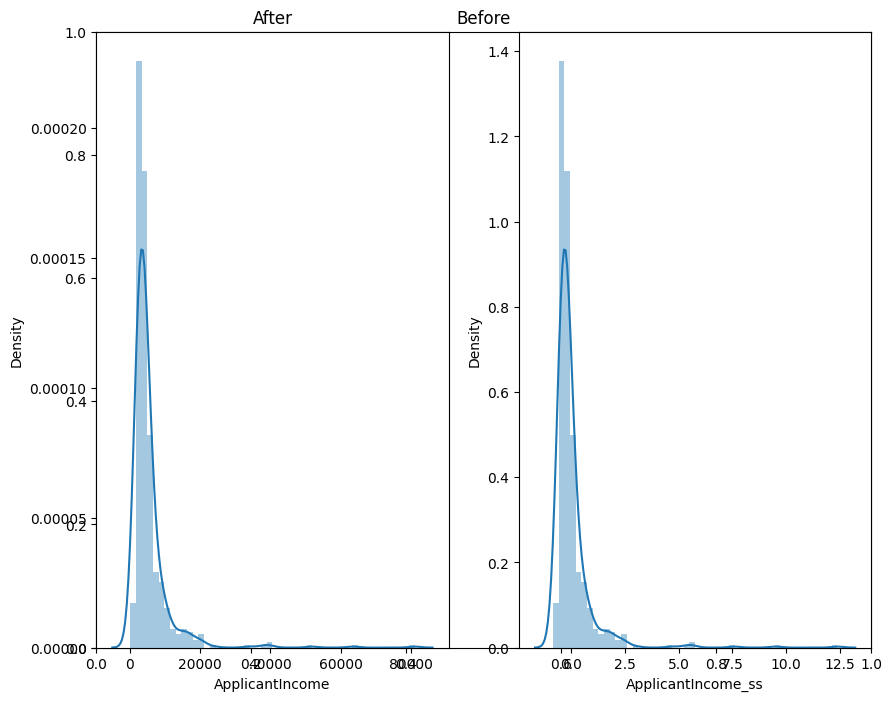

In [ ]:
# now we will check the data nature
plt.figure(figsize=(10,8))
plt.title("Before")
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'])

plt.title("After")
plt.subplot(1,2,2)
sns.distplot(df['ApplicantIncome_ss'])
plt.show()

There is no change in the nature of the data, only the dataset values become similar in size.

## FEATURES SCALING ##
**(NORMALIZATION) :**
Normalization means making all data values small and similar, usually range between 0 and 1.

Normalization (Min-Max Scaling) formula:

         Xnorm= X - Xmin/Xmax - Xmin

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
# There should be no null values in the column -
# where the operation is being performed.
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


C:\Users\admin\AppData\Local\Temp\ipykernel_7812\1457747018.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])


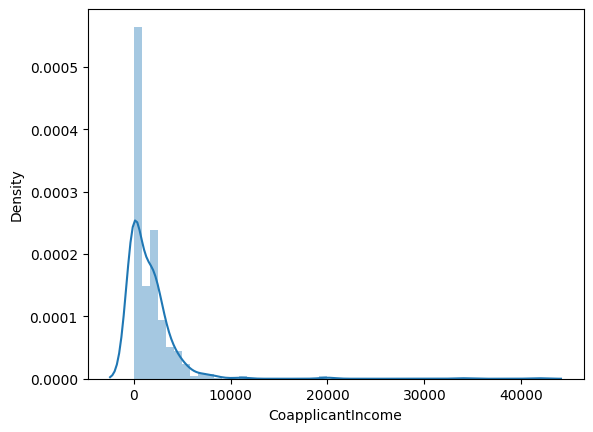

In [ ]:
sns.distplot(df['CoapplicantIncome'])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
ms=MinMaxScaler() 
ms.fit(df[['CoapplicantIncome']])  #2D

MinMaxScaler()

In [ ]:
df['CoapplicantIncome_ms']=ms.transform(df[['CoapplicantIncome']])

In [ ]:
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CoapplicantIncome_ms
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y,0.000000
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N,0.036192
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y,0.000000


C:\Users\admin\AppData\Local\Temp\ipykernel_7812\250029121.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'])
C:\Users\admin\AppData\Local\Temp\ipykernel_7812\250029121.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome_ms'])


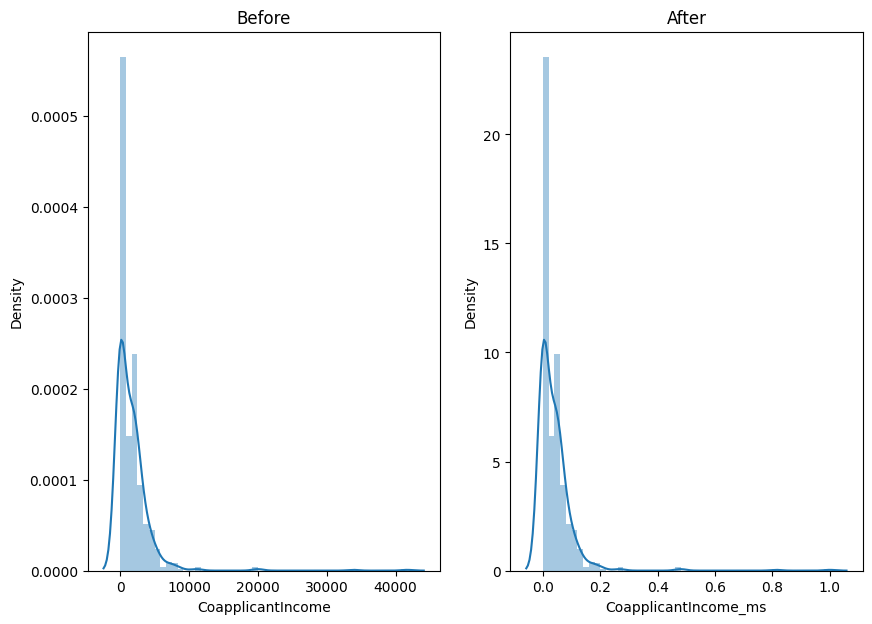

In [ ]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.distplot(df['CoapplicantIncome'])
plt.title('Before')

plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome_ms'])
plt.title('After')
plt.show()

There is no change in the nature of the data, only the changes in dataset values the range b/w(0 to 1)

## HANDLING DUPLICATE DATA ##

dupliacte?:all **row** is duplicate so we can say duplicate

In [ ]:
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
#creat new dataset
data={'Name':['A','B','C','D','A',"B"],'age':[1,2,3,4,1,2],'num':[12,34,454,67,12,34]}

In [ ]:
df=pd.DataFrame(data)  
df

,Name,age,num
0,A,1,12
1,B,2,34
2,C,3,454
3,D,4,67
4,A,1,12
5,B,2,34


In [ ]:
df.duplicated()

0    False
1    False
2    False
3    False
4     True
5     True
dtype: bool

In [ ]:
df

,Name,age,num
0,A,1,12
1,B,2,34
2,C,3,454
3,D,4,67
4,A,1,12
5,B,2,34


In [ ]:
df.drop_duplicates(inplace=True) # inplace use for changes in original dataset

In [ ]:
df 

,Name,age,num
0,A,1,12
1,B,2,34
2,C,3,454
3,D,4,67


In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 614, dtype: bool

In [ ]:
df.shape

(614, 13)

In [ ]:
df.drop_duplicates() 

(614, 13)

In [ ]:
df.shape # shape is same mean duplicate value is not present

(614, 13)

## REPLACE AND DATA TYPE CHANGE ##

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [ ]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [ ]:
df['Dependents'].replace('3+','3',inplace=True) #replace value put in str because now datatypes object"


In [ ]:
df['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [ ]:
df['Dependents']=df['Dependents'].astype('int64') #convert (object) datatypes into (int) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), int64(2), object(8)
memory usage: 62.5+ KB


## FUNCTION TRANSFORMER ##

Which convert to Non-normal distribution into normal distribution

In [ ]:
df=pd.read_csv('loan.csv')
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y


In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_7812\3385199946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


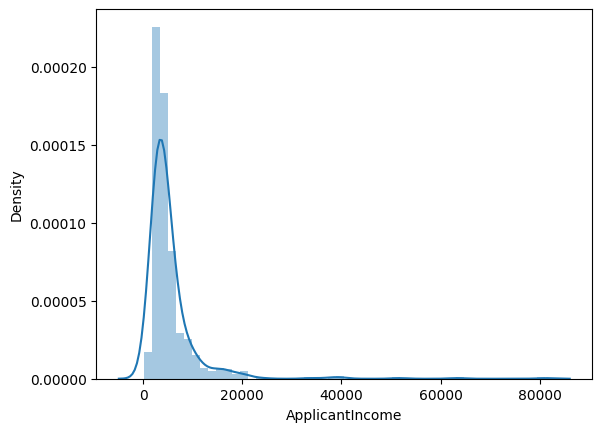

In [ ]:
sns.distplot(df['ApplicantIncome'])
plt.show()

In [ ]:
# first of all remove outlier then convert into normal distribution
# Remove outlier using IQR but outlier is important so you can directly perform without remove outlier

# Q1=df['ApplicantIncome'].quantile(0.25)
# Q3=df['ApplicantIncome'].quantile(0.75)
# Q1,Q3

In [ ]:
# IQR=Q3-Q1
# print(IQR)

In [ ]:
# Min_r=Q1-(1.5*IQR)
# max_r=Q3+(1.5*IQR)
# Min_r,max_r

In [ ]:
# # use for outlier remove
# df=df[df['ApplicantIncome']<=max_r]

In [ ]:
# sns.distplot(df['ApplicantIncome'])
# plt.show()

In [ ]:
# now we will convert non-normal distribution into Normal distributionso we use function transformer 

from sklearn.preprocessing import FunctionTransformer

In [ ]:
import numpy as np

In [ ]:
ft=FunctionTransformer(func=np.log1p)
df['ApplicantIncome_ft']=ft.fit_transform(df[['ApplicantIncome']])

C:\Users\admin\AppData\Local\Temp\ipykernel_7812\2614209974.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])
C:\Users\admin\AppData\Local\Temp\ipykernel_7812\2614209974.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome_ft'])


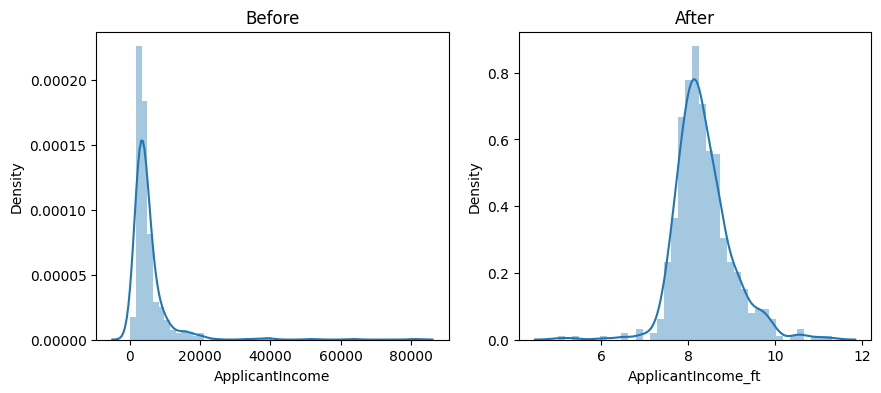

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'])
plt.title('Before')


plt.subplot(1,2,2)
sns.distplot(df['ApplicantIncome_ft'])
plt.title('After')
plt.show()

